# Genetic Algorithm for an optimization problem
## Search of the critical point of a simple function

In [1]:
from IPython.core.debugger import set_trace
import random
import pandas as pd
%matplotlib inline

We implement a simple GA for an optimization problem, using the dictionary data structure.

### Fitness Proportionate selection

In [2]:
def fit_prop_selection(pop, fitness):
    
    fitness = [fit/sum(fitness) for fit in fitness]
    
    fit_prop_dict = {j : [pop[j],fitness[j]] for j in range(len(fitness))}

    # Draw new population
    mating_pool = []
    for key in fit_prop_dict:
        arrow = 0
        r = random.uniform(0, 1)
        for key in fit_prop_dict:
            arrow += fit_prop_dict[key][1] 
            if arrow > r:
                mating_pool.append(fit_prop_dict[key][0])
                break
            
    return mating_pool

### Linear Rank selection

In [3]:
def lin_rank_selection(pop, fitness):
    n = len(pop)
    sorted_ind = sorted(range(len(fitness)), key=lambda k: fitness[k], reverse = True)
    fitness_rank = [2*pos/(n*(n+1)) for pos in range(1,len(fitness)+1)]
    
    linear_rank_dict = {j : [population[sorted_ind[j]],fitness_rank[j]] for j in range(len(fitness))}

    # Draw new population
    mating_pool = []
    for key in linear_rank_dict:
        arrow = 0
        r = random.uniform(0, 1)
        for key in linear_rank_dict:
            arrow += linear_rank_dict[key][1] 
            if arrow > r:
                mating_pool.append(linear_rank_dict[key][0])
                break
            
    return mating_pool

### Tournament selection

In [10]:
def tournament_selection(pop, fitness, k=3):
    n_pop = len(pop)

    pop_dict = {i : [pop[i], fitness[i]] for i in range(n_pop)}
    
    # Draw new population
    mating_pool = []
    for i in range(len(fitness)):
        best = random.randint(0, n_pop-1)
        for j in range(k):
            selected = random.randint(0, n_pop-1)
            if pop_dict[selected][1] > pop_dict[best][1]:
                    best = selected     
        mating_pool.append(pop_dict[best][0])

    return mating_pool

We define now the crossover and mutation functions. 

In [5]:
# crossover two parents to create two children
def crossover(p1, p2, r_cross):
	# children are copies of parents by default
	c1, c2 = p1.copy(), p2.copy()
	
	# check for recombination
	if random.uniform(0,1) < r_cross:
		# select crossover point that is not on the end of the string
		pt = random.randint(1, len(p1)-2)
		
		# perform crossover
		c1 = p1[:pt] + p2[pt:]
		c2 = p2[:pt] + p1[pt:]
	
	return [c1, c2]



# mutation operator
def mutation(bitstring, r_mut):
	for i in range(len(bitstring)):
		
		# check for a mutation
		if random.uniform(0,1) < r_mut:
			# flip the bit
			bitstring[i] = 1 - bitstring[i]

Here below, the Genetic Algorithm:

In [6]:
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut, selection):
	table = []
	# initial population of random bitstring
	population = [[random.randint(0, 1) for _ in range(n_bits)] for _ in range(n_pop)]
	
	# keep track of best solution
	best, best_eval = 0, objective(population[0])

    # enumerate generations
	for gen in range(n_iter):
		
        # evaluate all candidates in the population
		fitness = [objective(c) for c in population]
		
        # check for new best solution
		for i in range(n_pop):
			if fitness[i] < best_eval:
				best, best_eval = population[i], fitness[i]
				print(">%d, new best f(%s) = %.3f" % (gen,  population[i], fitness[i]))
		
        # select parents
		selected = selection
        # create the next generation
		children = list()
		for i in range(0, n_pop, 2):
			# get selected parents in pairs
			p1, p2 = selected[i], selected[(i+1)%(len(selected)-1)]
			
            # crossover and mutation
			for c in crossover(p1, p2, r_cross):
				# mutation
				mutation(c, r_mut)
				# store for next generation
				children.append(c)
		# replace population
		population = children
		table.append(best_eval)
	
	return table

We consider a populution of 100 individuals, each of them formed by a sequence of length 20 of zeros and ones.

As objective function, we take the -sum(). Hence, the minumum is obtained when the sequence is all made by ones. 

In [7]:
def onemax(x):
	return -sum(x)

In [73]:
n_iter = 350
n_bits = 40
n_pop = 500

r_cross = 0.9 # crossover rate
r_mut = 1 / float(n_bits) # mutation rate

#initial population
population = [[random.randint(0, 1) for _ in range(n_bits)] for _ in range(n_pop)]

#initial fitness
fitness = [-sum(c) for c in population]

In [74]:
table_fit_prop = genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut, fit_prop_selection(population, fitness))
print('Done!')

>0, new best f([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1]) = -23.000
>0, new best f([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1]) = -28.000
>0, new best f([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1]) = -29.000
>2, new best f([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]) = -30.000
>8, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]) = -32.000
Done!


In [75]:
table_lin_rank = genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut, lin_rank_selection(population, fitness))
print('Done!')

>0, new best f([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]) = -21.000
>0, new best f([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0]) = -23.000
>0, new best f([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]) = -26.000
>0, new best f([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0]) = -28.000
>0, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1]) = -30.000
>3, new best f([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = -32.000
>94, new best f([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [76]:
table_tournament = genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut, tournament_selection(population, fitness))
print('Done!')

>0, new best f([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1]) = -21.000
>0, new best f([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0]) = -22.000
>0, new best f([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1]) = -23.000
>0, new best f([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1]) = -25.000
>0, new best f([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1]) = -30.000
Done!


In [77]:
# timeit genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut, fit_prop_selection(population, fitness))

In [78]:
df = pd.DataFrame()
df['Fitness Proportionate'] = table_fit_prop
df['Linear Rank'] = table_lin_rank
df['Tournament'] = table_tournament

<AxesSubplot:>

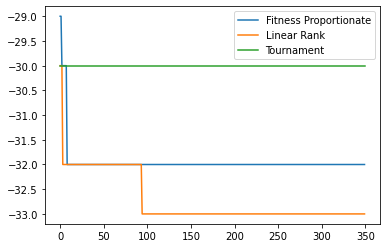

In [79]:
df.plot()